In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/Users/maxime/IronHack/Labs/module_3/3. Data-Cleaning-Challenge/iris-data.csv')

In [5]:
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.info()
# dtype ok, only one object column which will be encode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()
# check with histogram
# outliers min sepal_length of 0.055

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

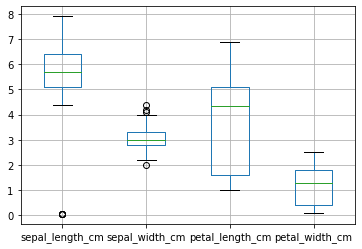

In [8]:
#plt.figure(figsize=(10, 6))

data.boxplot(column=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'])

<AxesSubplot:xlabel='sepal_length_cm', ylabel='class'>

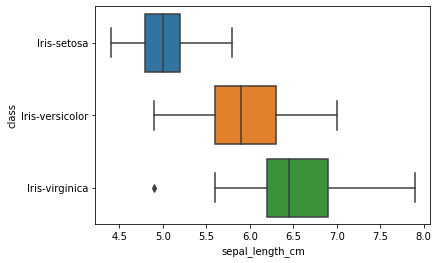

In [27]:
sns.boxplot(x='sepal_length_cm', y='class', data=data)

In [12]:
# check ouliers
data.sort_values(by='sepal_length_cm').head(20)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
38,4.4,3.0,1.3,0.2,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa


In [11]:
# drop rows with outliers
index_to_drop = data[data['sepal_length_cm']<0.1].index
data = data.drop(index_to_drop)

In [13]:
# Missing data
data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [14]:
data.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 145, dtype: bool

In [16]:
isnull = data.isnull().any(axis=1)
missing_values = pd.DataFrame(columns = data.columns)
for i in range(len(data)):
    if isnull[i] == True:
        missing_values = missing_values.append(data.loc[i])
missing_values

KeyError: 77

In [17]:
len(missing_values)/len(data)

0.03333333333333333

In [23]:
#replace missing values
data= data.interpolate(method='linear', axis=0, inplace=False)

In [24]:
data.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [17]:
# Inconsistent Data — Capitalization, Addresses and more, misspellings
data['class'].unique()
# Iris-Setossa, versicolor misspellings

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [18]:
data['class'].replace('Iris-setossa','Iris-setosa',inplace=True)
data['class'].replace('versicolor','Iris-versicolor',inplace=True)

In [19]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
# Unnecessary Data — Repetitive Data, Duplicates and more
data_fixed.duplicated().any().sum()
# 2 petals can have the same dimensions, only 1 duplicate seems reasonable

1

In [25]:
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
data.to_csv('/Users/maxime/IronHack/Labs/module_3/3. Data-Cleaning-Challenge/cleaned-iris.csv')